<a href="https://colab.research.google.com/github/Matyrela/algebra-aplicada/blob/main/Proyecto2-Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Análisis de imágenes con matrices

## Objetivo

El objetivo del presente trabajo es que el estudiante pueda aplicar los conceptos y técnicas de manipulación de matrices vistos en el curso, en el contexto del procesamiento de imágenes.

## Introducción
La capacidad de extraer conocimiento valioso a partir de imágenes, utilizando operaciones algebraicas, es esencial en muchas aplicaciones de Inteligencia Artificial, como la visión por computadora, y otras áreas del campo de la computación.

Las imágenes son un conjunto de píxels, que se utilizan para representar colores y tonos, formando en su conjunto la imagen.

Una imagen puede ser representada como una matriz, en donde el color de cada píxel está definido por un número entre 0 y 255, indicando la intensidad del brillo (en el caso de imágenes blanco y negro, 0 representa blanco y 255 negro).

El tamaño de las imágenes está determinado por su largo, su ancho y el número de canales, que refiere a los canales RGB que conforman los colores (rojo, verde y azul). En el caso de las imágenes a color, el número de canales es igual a 3, representando los 3 colores primarios.



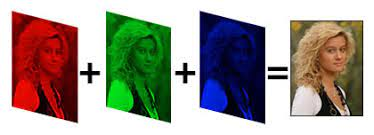

A modo ilustrativo de lo anterior, creamos una matriz de 3x3 utilizando la función `array` de `numpy` y la mostramos como una imagen utilizando la función `imshow` del paquete `skimage`. Por defecto, la función interpreta los colores en la escala RGB (Red - rojo, Green - verde , y Blue - azul).

Dependiendo de los números que coloquemos en las diferentes entradas de la matriz, el color que va a ser mostrado. *Recomendamos probar con diferentes valores para observar cómo cambia la imagen.*

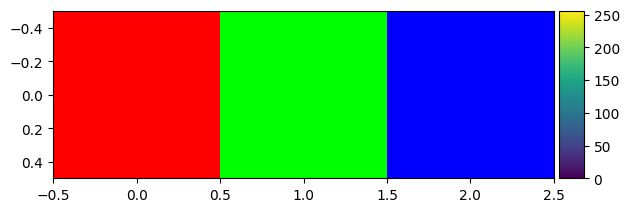

In [ ]:
# Importamos las librerias de Python necesarias
import numpy as np
from skimage.io import imshow, imread
import cv2
import os

# Creamos la matriz de 3x3 y la mostramos como imagen
imagen_color_array = np.array([[[255, 0, 0], # color del primer cuadrante
                         [0, 255, 0],  # color del segundo cuadrante
                         [0, 0, 255]]])  # color del tercer cuadrante
imshow(imagen_color_array);

In [ ]:
# Tamaño de la imagen
imagen_color_array.shape

(1, 3, 3)

Observamos que el tamaño de la imagen está dado por la tupla (1,3,3), indicando que la imagen tiene 1 fila, 3 columnas y 3 canales de color. Una imágen RGB es representada con un array 3D de la forma: (largo, ancho, canales).

La imagen anterior fue presentada de modo ilustrativo para introducirnos en el tema. A continuación vamos a estar trabajando con imágenes reales, que elegirá cada alumno para este proyecto.




A continuación les proporcionamos una función útil para poder recortar imágenes.

La función tiene como argumentos la ruta de la imagen objetivo, la ruta donde deseen guardar la imagen recortada y el largo y ancho deseados para esta última.

In [ ]:
def recortar_imagen_v2(ruta_img: str, ruta_img_crop: str, x_inicial: int, x_final: int, y_inicial: int, y_final: int)-> None:
    """
    Esta función recibe una imagen y devuelve otra imagen recortada.

    Args:
      ruta_img (str): Ruta de la imagen original que se desea recortar.
      ruta_img_crop (str): Ruta donde se guardará la imagen recortada.
      x_inicial (int): Coordenada x inicial del área de recorte.
      x_final (int): Coordenada x final del área de recorte.
      y_inicial (int): Coordenada y inicial del área de recorte.
      y_final (int): Coordenada y final del área de recorte.

    Return
      None
    """
    try:
        # Abrir la imagen
        image = cv2.imread(ruta_img)

        # Obtener la imagen recortada
        image_crop = image[x_inicial:x_final, y_inicial:y_final]

        # Guardar la imagen recortada en la ruta indicada
        cv2.imwrite(ruta_img_crop, image_crop)

        print("Imagen recortada con éxito. El tamaño de la imagen es de" + str(image_crop.shape))
    except Exception as e:
        print("Ha ocurrido un error:", str(e))


Para poder realizar lo que se solicita en la propuesta de la presente entrega, es necesario correr las líneas de código a continuación. El objetivo es montar Google Drive a la máquina virtual de Google Colab.

Se debe especificar en la variable `RUTA_TAREA` la ruta donde se van a estar guardando las imágenes que van a ser cargadas a la tarea posteriormente. Además, estas imágenes deben ser entregadas.

In [ ]:
# Monta tu Google Drive a la máquina virtual de Colab.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Cambiar el directorio actual al directorio donde se encuentra la tarea.
# Especificar la ruta donde se van a guardar los archivos que pide la tarea.
# Por ejemplo: '/content/drive/My Drive/Algebra Aplicada UCU'
os.chdir('/content/drive/My Drive/UCU/Algebra') #Modificar esta línea

Mounted at /content/drive


A continuación solicitamos:
1. Cargar dos imagenes a elección utilizando `imread` y mostrarlas como imagen.
2. Imprimir el tamaño de cada una de las imágenes.
3. Recortar ambas imágenes para que tengan el mismo tamaño, siendo un requisito que la imagen sea **cuadrada**. Mostrar el resultado obtenido como imágenes.

  **Recordatorio**: Pueden utilizar la función proporcionada: `recortar_imagen`. Esta función además de recortar la imagen la guarda en el directorio indicado.

  Comentar la importancia de este paso en caso de querer realizar operaciones entre las dos imágenes.
4. Para **una** de las imágenes recortadas, mostrarla como una matriz. Imprimir el tamaño.
5. Calcular la matriz traspuesta de las imágenes del punto 3. Mostrarlas como matriz y como imagen. Comentar los resultados.

  **NOTA**: se deben trasponer las coordenadas x,y y dejo igual eje z (canales de RGB).
6. Convertir y mostrar las imagenes recortadas a escala de grises.

  **NOTA**: recordar que un método para calcular la imagen en escala de grises es promediando los valores de cada color, es decir sumando los tres canales R, G, B de la imagen color y diviendo entre 3: $I_{Grayscale} = (R + G + B ) / 3$.

**Del punto 6 en adelante, utilizar las imágenes en blanco y negro obtenidas en dicho punto**
7. Verificar para cada una de las matrices correspondientes a las imágenes recortadas, si existe su inversa y en caso de que exista, calcular.
8.  Producto de una matriz por un escalar

  **Aplicación**: Ajuste de contraste en imágenes:

  Como vimos en el curso, una de las operaciones que podemos realizar con matrices, es la multiplicación por un escalar  α. Esta operación se traduce en un cambio en el contraste de la imagen .  𝐼2(𝑥,𝑦)=α𝐼1(𝑥,𝑦)

  Observar y comentar qué ocurre con las imagenes del punto 6 al multiplicarla por un escalar  α  en dos casos:
    - CASO 1: $\alpha>1$  
    - CASO 2: $0<\alpha<1$
     
  Utilizar un escalar a elección dentro de dicho rango de valores. Interpretar el resultado.

  **NOTA**: Tener en cuenta que los valores del píxel deben estar entre 0 y 255. Se puede utilizar la función `np.clip` para restringir los valores luego de realizar la operación.

  Para este punto **elegir solo una** de las dos imágenes.

9.  Multipicación de matrices y prueba de que la multiplicación de matrices no es conmutativa:

  Como vimos en el curso, debemos recordar que en la multiplicación de matrices **el orden en el que se multiplican las matrices sí importa,** esto lo podemos ver en las siguientes aplicaciones:

  **Aplicación:** Voltear una imágen

  Para voltear una imagen alrededor del eje $x$ podemos multiplicar la imagen original por una matriz $W$ con 1's en la anti-diagonal. Para generar esta última matriz, les recomendamos primero generar la matriz identidad del mismo tamaño que la imagen, y luego utilizar la función `np.fliplr` para obtener $W$.

  Comentar el resultado. Qué ocurre si invertimos el orden en el que multiplicamos las matrices?

10. Calcular el negativo de una de las imagenes utilizando la resta de matrices.

    **NOTA**: El negativo de la imagen se calcula restando la matriz que se muestra a continuación a la imagen (matriz_auxiliar - imagen):

    \begin{bmatrix}
    255 & 255 & \dots \\
    \vdots & \ddots & \\
    255 &        & 255
    \end{bmatrix}